In [ ]:
# Phase 1 - T1.0 : Exploration des données IMDB

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

movies = pd.read_csv("csv/movies.csv")
persons = pd.read_csv("csv/persons.csv")
characters = pd.read_csv("csv/characters.csv")
directors = pd.read_csv("csv/directors.csv")
genres = pd.read_csv("csv/genres.csv")
principals = pd.read_csv("csv/principals.csv")
ratings = pd.read_csv("csv/ratings.csv")
titles = pd.read_csv("csv/titles.csv")
writers = pd.read_csv("csv/writers.csv")
professions = pd.read_csv("csv/professions.csv")
knownformovies = pd.read_csv("csv/knownformovies.csv")

print("✅ Données chargées.")


✅ Données chargées.


In [4]:
import re

def clean_columns(df):
    df = df.copy()
    df.columns = [
        re.sub(r"[()']", "", str(col)).replace(",", "").strip()
        for col in df.columns
    ]
    return df

movies = clean_columns(movies)
persons = clean_columns(persons)
characters = clean_columns(characters)
directors = clean_columns(directors)
genres = clean_columns(genres)
principals = clean_columns(principals)
ratings = clean_columns(ratings)
titles = clean_columns(titles)
writers = clean_columns(writers)
professions = clean_columns(professions)
knownformovies = clean_columns(knownformovies)

movies.columns


Index(['mid', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes'],
      dtype='object')

In [ ]:
## 2. Statistiques descriptives

Pour chaque fichier CSV, nous affichons :
- le nombre de lignes et de colonnes
- les types de données
- le nombre de valeurs manquantes
- le nombre de valeurs uniques par colonne


In [5]:
datasets = {
    "movies": movies,
    "persons": persons,
    "characters": characters,
    "directors": directors,
    "genres": genres,
    "principals": principals,
    "ratings": ratings,
    "titles": titles,
    "writers": writers,
    "professions": professions,
    "knownformovies": knownformovies,
}

for name, df in datasets.items():
    print("="*70)
    print(f"📌 {name.upper()}")
    print(df.info())
    print("\nValeurs manquantes :")
    print(df.isna().sum())
    print("\nValeurs uniques :")
    print(df.nunique())
    print("\n")


📌 MOVIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36859 entries, 0 to 36858
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             36859 non-null  object 
 1   titleType       36859 non-null  object 
 2   primaryTitle    36859 non-null  object 
 3   originalTitle   36859 non-null  object 
 4   isAdult         36859 non-null  int64  
 5   startYear       36859 non-null  int64  
 6   endYear         0 non-null      float64
 7   runtimeMinutes  36819 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB
None

Valeurs manquantes :
mid                   0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             0
endYear           36859
runtimeMinutes       40
dtype: int64

Valeurs uniques :
mid               36859
titleType             1
primaryTitle      34406
originalTitle     35206
isAdult               1


In [ ]:
## 3. Analyses exploratoires (visualisations)


In [ ]:
### Distribution des films par année


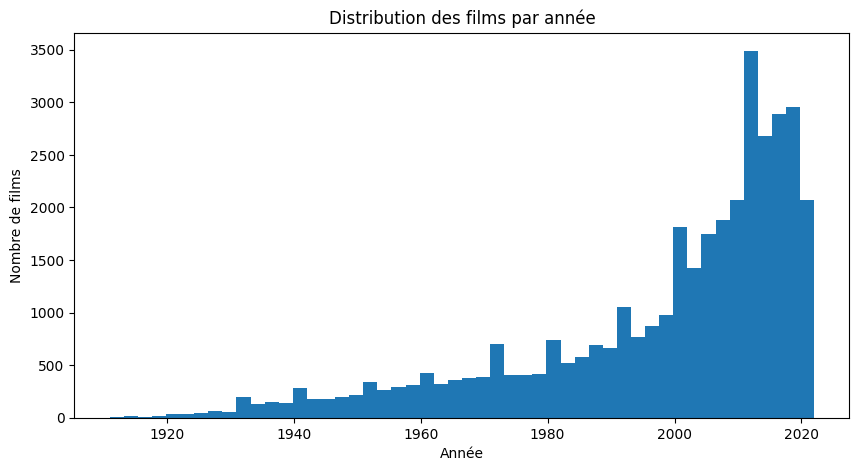

In [6]:
movies['startYear'].plot(kind="hist", bins=50, figsize=(10, 5))
plt.title("Distribution des films par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.show()


In [ ]:
La distribution montre une forte évolution du nombre de films produits au fil du temps.

Avant 1950, la production cinématographique reste relativement faible, avec quelques dizaines à quelques centaines de films par an.
Entre 1950 et 1990, on observe une croissance progressive mais encore modérée.
À partir des années 2000, la production augmente très fortement, dépassant les 1000 films par an.
Le pic est atteint vers 2015–2020, où l’on dépasse les 3000 films par an.
    
Cette croissance est cohérente avec l’évolution de l’industrie du cinéma et l’explosion du contenu audiovisuel (streaming, productions internationales, films indépendants, etc.).
En conclusion, la base IMDB reflète clairement une expansion massive de la production cinématographique au cours des 20 dernières années, avec un volume jamais atteint auparavant.

In [9]:
movies.columns


Index(['('mid',)', '('titleType',)', '('primaryTitle',)', '('originalTitle',)',
       '('isAdult',)', '('startYear',)', '('endYear',)',
       '('runtimeMinutes',)'],
      dtype='object')

In [ ]:
### Top 10 des genres les plus fréquents

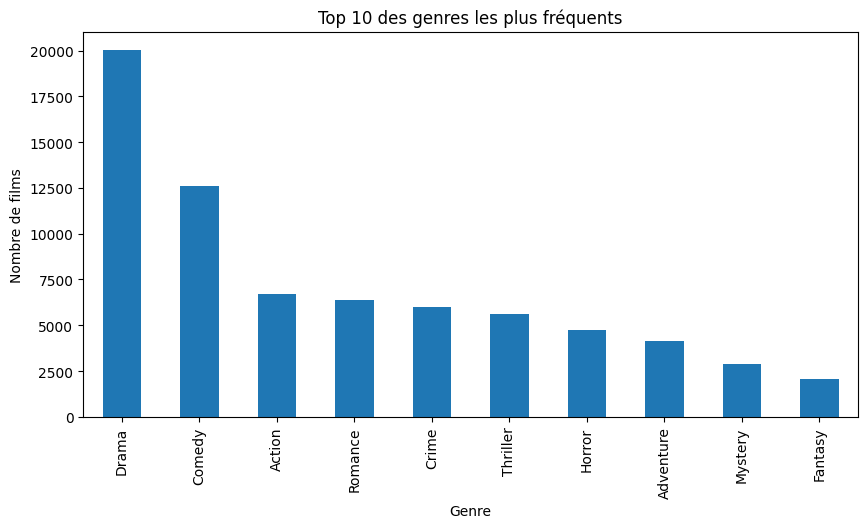

In [13]:
genres['genre'].value_counts().head(10).plot(
    kind="bar",
    figsize=(10, 5)
)

plt.title("Top 10 des genres les plus fréquents")
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.show()


In [ ]:
La distribution des genres montre une nette domination du genre Drama, qui apparaît comme le genre le plus fréquent avec plus de 20 000 occurrences.

Il est suivi par Comedy, qui constitue également une part importante du dataset avec environ 12 500 entrées.
Les genres Action, Romance, Crime et Thriller occupent les positions intermédiaires, chacun comptant entre 5 500 et 7 000 films.

En bas du classement, des genres comme Horror, Adventure, Mystery et Fantasy apparaissent moins représentés, avec moins de 4 000 occurrences chacun.

Cette distribution montre que la base de données est fortement orientée vers les genres narratifs traditionnels (Drama, Comedy), tandis que les genres plus spécialisés ou à audience plus ciblée sont moins présents.
Cela reflète à la fois la production cinématographique réelle et la manière dont les titres sont classés dans la base IMDB.

In [ ]:
### Distribution des notes moyennes

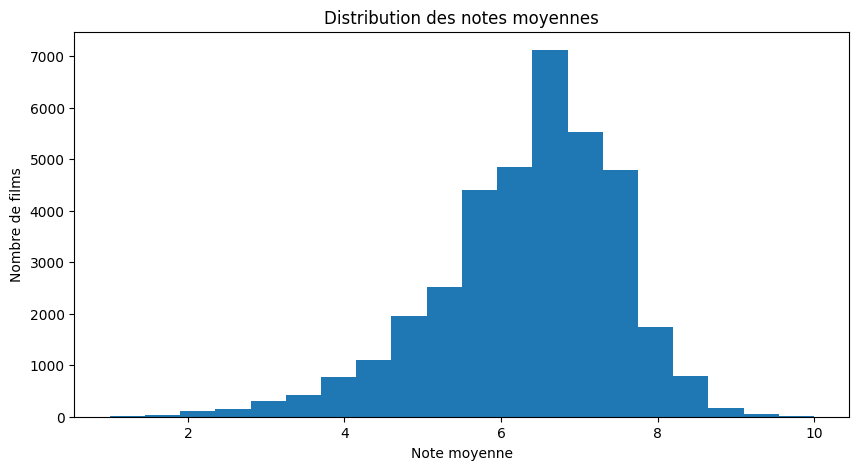

In [14]:
ratings['averageRating'].plot(
    kind="hist",
    bins=20,
    figsize=(10, 5)
)

plt.title("Distribution des notes moyennes")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de films")
plt.show()


In [ ]:
Observation : 

La distribution des notes moyennes suit une forme globalement gaussienne (en cloche), centrée autour de 6 à 7, ce qui est cohérent avec les tendances habituelles des notations IMDB.

On observe que :

Très peu de films obtiennent une note inférieure à 3.
Les notes comprises entre 5 et 8 regroupent la grande majorité des films.
Le pic principal se situe autour de 6,5, ce qui signifie qu’un grand nombre de films reçoivent une note modérément positive.
Les films très mal notés (0 à 2) ou exceptionnellement bien notés (9 à 10) sont très rares.

Cette distribution traduit le fait que la plupart des films obtiennent des évaluations moyennes à bonnes, tandis que les extrêmes sont peu fréquents. Cela reflète généralement le comportement des utilisateurs : les très bonnes ou très mauvaises notes sont moins nombreuses que les évaluations intermédiaires.

In [ ]:
### Nombre d'acteurs par film

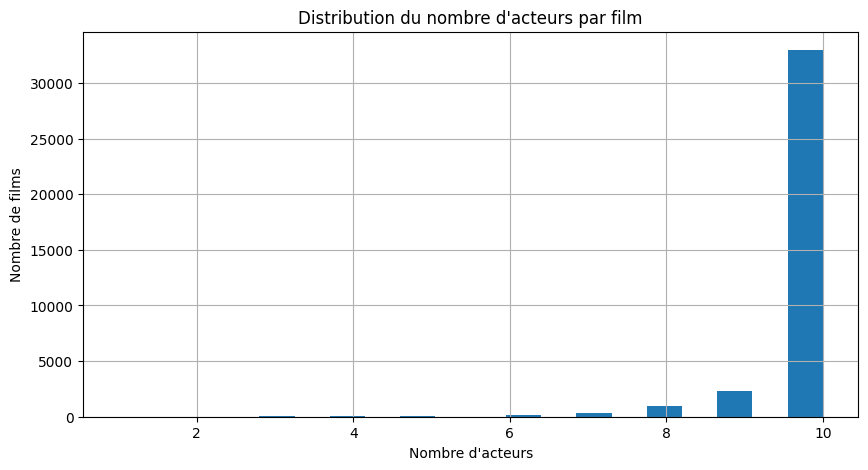

Nombre moyen d'acteurs par film : 9.817493692178301


In [15]:
actors_per_movie = principals.groupby("mid")["pid"].count()

actors_per_movie.hist(bins=20, figsize=(10, 5))
plt.title("Distribution du nombre d'acteurs par film")
plt.xlabel("Nombre d'acteurs")
plt.ylabel("Nombre de films")
plt.show()

print("Nombre moyen d'acteurs par film :", actors_per_movie.mean())


In [ ]:
Observation :

L’analyse du nombre d’acteurs par film montre une distribution très déséquilibrée.
La grande majorité des films comptent exactement 10 acteurs, ce qui correspond à la limite imposée par la table IMDB principals, qui ne conserve que les 10 personnes les plus importantes associées à un film.
Seuls quelques films possèdent moins de 10 acteurs, ce qui peut être dû soit à un manque d’informations dans les données, soit à des productions réellement plus petites.
Le nombre moyen d’acteurs par film est d’environ 9,82, ce qui confirme que la plupart des films atteignent le plafond de 10 personnes.
Cette distribution n’est donc pas représentative du nombre réel d’acteurs par film, mais plutôt d’une contrainte structurelle du dataset IMDB.

In [ ]:
## 4. Relations entre tables

Dans cette partie, nous vérifions la cohérence des relations entre les tables du dataset :
- vérification des « clés étrangères » basées sur l’identifiant de film (`mid`) ;
- vérification des identifiants de personnes (`pid`) ;
- identification des éventuelles données orphelines (lignes qui référencent un `mid` ou un `pid` inexistant).


In [ ]:
### Vérification de la cohérence des identifiants `mid`

Nous vérifions ici que toutes les tables secondaires (`genres`, `principals`, `directors`, etc.)
ne contiennent que des identifiants de films (`mid`) présents dans la table principale `movies`.

Un `mid` absent indiquerait une donnée orpheline, donc une incohérence dans le dataset.


In [8]:
# Ensemble des identifiants de films présents dans la table principale
movies_ids = set(movies["mid"])

tables_mid = [
    ("genres", genres, "mid"),
    ("principals", principals, "mid"),
    ("directors", directors, "mid"),
    ("writers", writers, "mid"),
    ("titles", titles, "mid"),
    ("ratings", ratings, "mid"),
    ("knownformovies", knownformovies, "mid"),
    ("characters", characters, "mid"),
]

print("=== Vérification des mid (films) dans les autres tables ===\n")
for name, df, col in tables_mid:
    missing_ids = set(df[col]) - movies_ids
    print(f"{name} : {len(missing_ids)} mid orphelins")


=== Vérification des mid (films) dans les autres tables ===

genres : 0 mid orphelins
principals : 0 mid orphelins
directors : 0 mid orphelins
writers : 0 mid orphelins
titles : 0 mid orphelins
ratings : 0 mid orphelins
knownformovies : 0 mid orphelins
characters : 0 mid orphelins


In [ ]:
Tous les résultats affichent `0 mid orphelins`.  
Cela signifie que toutes les tables qui référencent un film utilisent un `mid` valide présent dans `movies.csv`.

Le dataset est donc parfaitement cohérent pour les films.


In [ ]:
### Vérification des identifiants `pid` (personnes)

Dans cette partie, nous vérifions que toutes les tables qui référencent des personnes (via `pid`)
contiennent uniquement des identifiants présents dans la table principale `persons`.

Les tables concernées sont :
- `principals`
- `directors`
- `writers`
- `characters`
- `professions`
- `knownformovies`

Pour chaque table, nous mesurons le nombre de `pid` inexistants dans `persons.pid`.
Un `pid` absent indique une clé étrangère orpheline, donc une incohérence dans le dataset.


In [9]:
# Ensemble des identifiants de personnes présents dans la table principale
persons_ids = set(persons["pid"])

tables_pid = [
    ("principals", principals, "pid"),
    ("directors", directors, "pid"),
    ("writers", writers, "pid"),
    ("characters", characters, "pid"),
    ("professions", professions, "pid"),
    ("knownformovies", knownformovies, "pid"),
]

print("=== Vérification des pid (personnes) dans les autres tables ===\n")
for name, df, col in tables_pid:
    missing_ids = set(df[col]) - persons_ids
    print(f"{name} : {len(missing_ids)} pid orphelins")


=== Vérification des pid (personnes) dans les autres tables ===

principals : 5 pid orphelins
directors : 0 pid orphelins
writers : 2 pid orphelins
characters : 5 pid orphelins
professions : 0 pid orphelins
knownformovies : 0 pid orphelins


In [ ]:
Les résultats montrent que :

- certaines tables contiennent des identifiants `pid` inexistants :
  - `principals` : 5 pid orphelins  
  - `writers` : 2 pid orphelins  
  - `characters` : 5 pid orphelins  
- d'autres tables sont parfaitement cohérentes :
  - `directors`, `professions`, `knownformovies`

Ces identifiants orphelins correspondent probablement à des entrées manquantes 
dans la table `persons`.  
Ce type d’anomalie est courant dans les datasets IMDB ou Kaggle.


In [ ]:
### Identification des données orphelines


In [ ]:
### Vérification des identifiants `mid` (films) et recherche d'orphelins

Nous reproduisons la même analyse pour les identifiants `mid`, référencés dans les tables :

- `genres`
- `principals`
- `directors`
- `writers`
- `titles`
- `ratings`
- `knownformovies`
- `characters`

Nous vérifions que chaque `mid` utilisé dans ces tables existe bien dans la table principale `movies`.


In [10]:
# Exemple : lignes orphelines basées sur mid dans chaque table liée aux films
orphans_mid = {}

for name, df, col in [
    ("genres", genres, "mid"),
    ("principals", principals, "mid"),
    ("directors", directors, "mid"),
    ("writers", writers, "mid"),
    ("titles", titles, "mid"),
    ("ratings", ratings, "mid"),
    ("knownformovies", knownformovies, "mid"),
    ("characters", characters, "mid"),
]:
    orphans = df[~df[col].isin(movies["mid"])]
    orphans_mid[name] = orphans
    print(f"{name} : {len(orphans)} lignes orphelines (mid inconnus)")


genres : 0 lignes orphelines (mid inconnus)
principals : 0 lignes orphelines (mid inconnus)
directors : 0 lignes orphelines (mid inconnus)
writers : 0 lignes orphelines (mid inconnus)
titles : 0 lignes orphelines (mid inconnus)
ratings : 0 lignes orphelines (mid inconnus)
knownformovies : 0 lignes orphelines (mid inconnus)
characters : 0 lignes orphelines (mid inconnus)


In [ ]:
Tous les résultats sont égaux à `0 ligne orpheline`.

Cela signifie que :

Toutes les références aux films (`mid`) dans les autres tables  
sont cohérentes et existent bien dans `movies.mid`.

Le dataset ne contient aucune incohérence concernant les identifiants de films.


In [ ]:
## Identification des données orphelines

Une donnée est dite orpheline lorsque :
- elle référence un `mid` absent de la table `movies`, ou
- elle référence un `pid` absent de la table `persons`.

Dans cette section, nous listons précisément les lignes concernées afin de documenter
le niveau d’incohérence du dataset et de préparer un nettoyage éventuel.


In [11]:
# Lignes orphelines basées sur pid dans les tables liées aux personnes
orphans_pid = {}

for name, df, col in [
    ("principals", principals, "pid"),
    ("directors", directors, "pid"),
    ("writers", writers, "pid"),
    ("characters", characters, "pid"),
    ("professions", professions, "pid"),
    ("knownformovies", knownformovies, "pid"),
]:
    orphans = df[~df[col].isin(persons["pid"])]
    orphans_pid[name] = orphans
    print(f"{name} : {len(orphans)} lignes orphelines (pid inconnus)")


principals : 5 lignes orphelines (pid inconnus)
directors : 0 lignes orphelines (pid inconnus)
writers : 2 lignes orphelines (pid inconnus)
characters : 5 lignes orphelines (pid inconnus)
professions : 0 lignes orphelines (pid inconnus)
knownformovies : 0 lignes orphelines (pid inconnus)


In [14]:
orphans_pid["principals"].head()

,mid,ordering,pid,category,job
147673,tt0281063,9,nm0706571,actor,NaN
208461,tt10763618,9,nm10893293,actress,NaN
290600,tt3172520,1,nm13465910,self,NaN
290602,tt3172520,3,nm13465907,self,NaN
290603,tt3172520,4,nm13465909,self,NaN


In [15]:
orphans_pid["writers"].head()

,mid,pid
8294,tt0048064,nm0799875
56231,tt1431181,nm12985319


In [16]:
orphans_pid["characters"].head()

,mid,pid,name
62704,tt0281063,nm0706571,Madeline
88365,tt10763618,nm10893293,Hyun-joo
122848,tt3172520,nm13465910,Self
122850,tt3172520,nm13465907,Self
122851,tt3172520,nm13465909,Self


In [17]:
set(orphans_pid["principals"]["pid"])

{'nm0706571', 'nm10893293', 'nm13465907', 'nm13465909', 'nm13465910'}

In [ ]:
### Identification des données orphelines

À partir des tests précédents, nous avons identifié les lignes dites orphelines, c’est-à-dire celles qui :

- référencent un `mid` qui n’existe pas dans `movies.mid`, ou
- référencent un `pid` qui n’existe pas dans `persons.pid`.

Les résultats montrent que :
- il n’existe aucune ligne orpheline basée sur `mid` dans les tables `genres`, `principals`, `directors`, `writers`, `titles`, `ratings`, `knownformovies` et `characters` ;
- en revanche, quelques lignes orphelines basées sur `pid` sont présentes dans les tables `principals`, `writers` et `characters`.

Les DataFrames `orphans_pid["principals"]`, `orphans_pid["writers"]` et `orphans_pid["characters"]` listent précisément ces cas.  
Ces anomalies restent marginales par rapport à la taille totale du dataset et pourront être filtrées lors du chargement en base relationnelle (par exemple en supprimant ces lignes ou en les excluant lors des jointures).
